# Single Variable Linear Regression Model
* Notebook runs a single variable regression comparing log(SalePrice) to log(TotLivingSF)
    * Utilizes a training set of 70% and a testing set of 30%
* Notebook also verifies the following assumptions are true for the single variable model:
    * Linearity
    * Normality
    * Errors of mean 0
    * Homoscedasticity
* Testing R squared value is 70.5% meaning that the model explains 70.5% of the variation in log(SalePrice)
* Model generally does a good job of approximating the dependent variable, but consistently undervalues many expensive homes that are outliers in the dataset
* Notebook exports the predictions into their own CSV to be submitted to Kaggle competition

## General Setup

In [1]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge
# from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

In [2]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load dataset
training_data = pd.read_csv("02-cleaned_data/cleaned_training.csv",index_col=0)

In [4]:
# Drop extreme outliers
training_data.drop(index = training_data[(training_data.GrLivArea>4000) & (training_data.SalePrice<300000)].index.tolist(), inplace=True)

In [5]:
# Calculate total square feet metric
training_data["TotLivingSF"] = training_data["GrLivArea"] + training_data["TotalBsmtSF"] - training_data["LowQualFinSF"]

In [6]:
# Shrink the dataframe to only relevant columns
training_data = training_data[["TotLivingSF","SalePrice"]]

## Verify Assumptions

### Assumption #1: Linearity
* Relationship between independent and dependent variable needs to be linear
* When both the independent and dependent variables are logarithmically transformed, they have a visible linear relationship

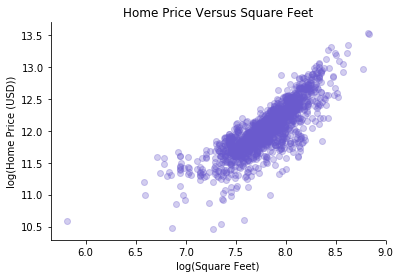

In [7]:
# Show a scatter plot compaing home price and home square feet
plt.scatter(np.log(training_data['TotLivingSF']),np.log(training_data['SalePrice']),color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

### Assumption #2: Mean of Residuals is Zero
* The residual plot of the regression reveals that the mean of the errors tends to be very close to 0

Text(0.5,0,'log(Square Feet)')

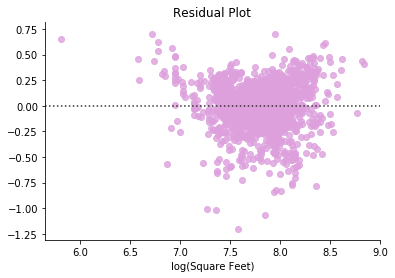

In [8]:
# Define independent and dependent variables
X = np.log(training_data.loc[:,"TotLivingSF"].values)
y = np.log(training_data.iloc[:,-1].values)

# Instantiate the linear model and visualizer
sns.residplot(X, y, color="plum")
sns.despine()
plt.title("Residual Plot")
plt.xlabel("log(Square Feet)")

### Assumption #3: Homoscedasticity
* Homoscedasticity means that the error term variance is the same across all the independent variables
* The above residuals plot shows that the errors are relatively homoscedastic

### Assumption #4: Normality
* The following q-q plots confirm that the independent and dependent variables are normally distributed when both the independent and dependent variables are transformed

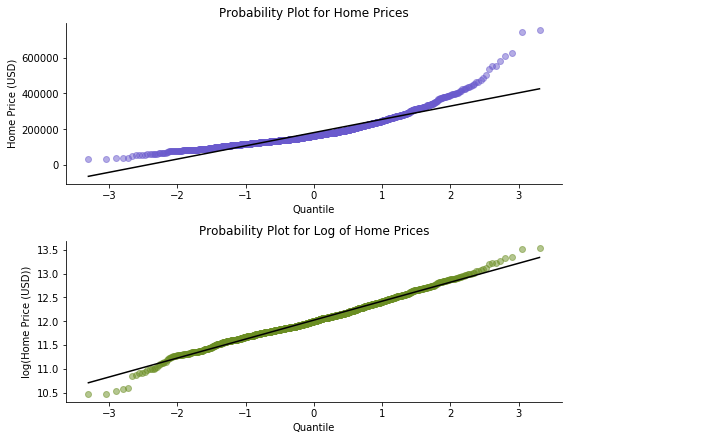

In [9]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create QQ Plot of home price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0, :2])
stats.probplot(training_data["SalePrice"], plot = ax1)

# Change titles
plt.title("Probability Plot for Home Prices")
plt.xlabel("Quantile")
plt.ylabel("Home Price (USD)")

# Change line and marker colors
ax1.get_lines()[0].set_markeredgecolor('slateblue')
ax1.get_lines()[0].set_markerfacecolor('slateblue')
ax1.get_lines()[0].set_alpha(0.5)
ax1.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of log of home price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
stats.probplot(np.log(training_data.SalePrice), plot = ax2)
# Change titles
plt.title("Probability Plot for Log of Home Prices")
plt.xlabel("Quantile")
plt.ylabel("log(Home Price (USD))")
# Change line and marker colors
ax2.get_lines()[0].set_markeredgecolor('olivedrab')
ax2.get_lines()[0].set_markerfacecolor('olivedrab')
ax2.get_lines()[0].set_alpha(0.5)
ax2.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

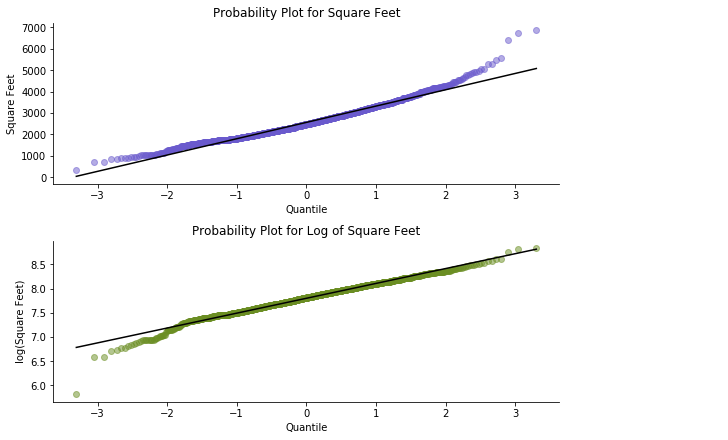

In [10]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,6))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=square_feet_fig)

# Create QQ Plot of square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0, :2])
stats.probplot(training_data["TotLivingSF"], plot = ax1)

# Change titles
plt.title("Probability Plot for Square Feet")
plt.xlabel("Quantile")
plt.ylabel("Square Feet")

# Change line and marker colors
ax1.get_lines()[0].set_markeredgecolor('slateblue')
ax1.get_lines()[0].set_markerfacecolor('slateblue')
ax1.get_lines()[0].set_alpha(0.5)
ax1.get_lines()[1].set_color('black')

# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
stats.probplot(np.log(training_data.TotLivingSF), plot = ax2)

# Change titles
plt.title("Probability Plot for Log of Square Feet")
plt.xlabel("Quantile")
plt.ylabel("log(Square Feet)")

# Change line and marker colors
ax2.get_lines()[0].set_markeredgecolor('olivedrab')
ax2.get_lines()[0].set_markerfacecolor('olivedrab')
ax2.get_lines()[0].set_alpha(0.5)
ax2.get_lines()[1].set_color('black')

# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

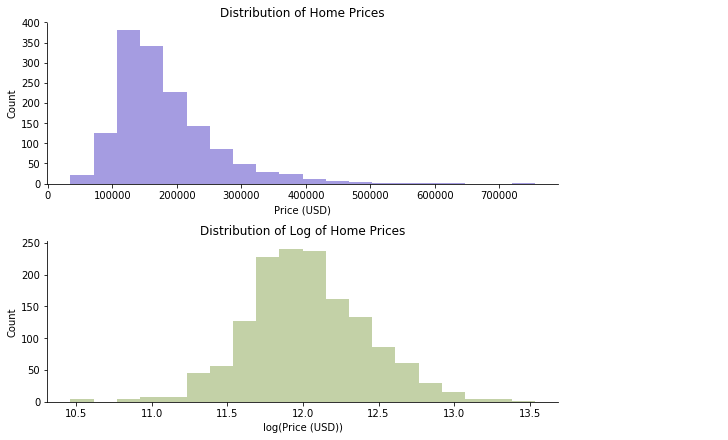

In [11]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create histogram for housing price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0,:2])
ax1.set_title("Distribution of Home Prices")
training_data["SalePrice"].hist(bins=20,color="slateblue",alpha=0.6)
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Create histogram for log of housing price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
ax2.set_title("Distribution of Log of Home Prices")
np.log(training_data["SalePrice"]).hist(bins=20,color="olivedrab",alpha=0.4)
plt.xlabel("log(Price (USD))")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [12]:
print("------------------------------------------------------------------")
print(f"Skew of the housing price data is: {round(training_data['SalePrice'].skew(),3)}")
print(f"Skew of the log of housing price data is: {round(np.log(training_data['SalePrice']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the housing price data is: 1.881
Skew of the log of housing price data is: 0.122
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


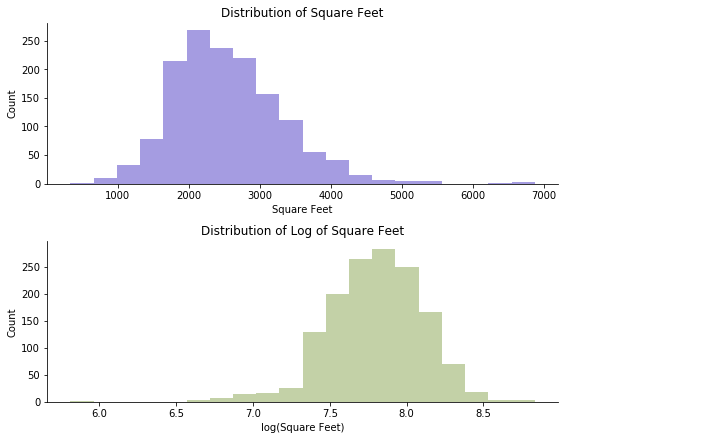

In [13]:
# Establish figure and grid to create two charts in the same image
sf_fig = plt.figure(constrained_layout=True,figsize=(10,6))
sf_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=sf_fig)

# Create histogram for housing price data
ax1 = sf_fig.add_subplot(sf_grid[0,:2])
ax1.set_title("Distribution of Square Feet")
training_data["TotLivingSF"].hist(bins=20,color="slateblue",alpha=0.6)
plt.xlabel("Square Feet")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Create histogram for log of housing price data
ax2 = sf_fig.add_subplot(sf_grid[1, :2])
ax2.set_title("Distribution of Log of Square Feet")
np.log(training_data["TotLivingSF"]).hist(bins=20,color="olivedrab",alpha=0.4)
plt.xlabel("log(Square Feet)")
plt.ylabel("Count")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [14]:
print("------------------------------------------------------------------")
print(f"Skew of the square feet data is: {round(training_data['TotLivingSF'].skew(),3)}")
print(f"Skew of the log of square feet data is: {round(np.log(training_data['TotLivingSF']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the square feet data is: 0.804
Skew of the log of square feet data is: -0.471
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


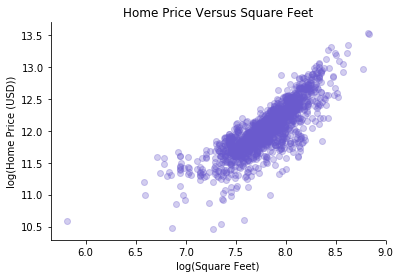

In [15]:
# Show a scatter plot compaing home price and home square feet
plt.scatter(np.log(training_data['TotLivingSF']),np.log(training_data['SalePrice']),color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

## Run the Single Variable Regression

In [16]:
# Separate x and y variables

# Matrix of independent variable (square feet data)
X = np.log(training_data.loc[:,["TotLivingSF"]].values)

# Vector of dependent variable (home sale price)
y = np.log(training_data.iloc[:,-1].values)

In [17]:
# Split data into training and testing set

# Random_state of 0 ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)

In [18]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()

# Fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

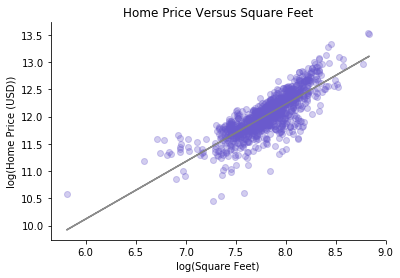

In [20]:
# Visualizing the training set results

# Scatter plot of the actual training results
plt.scatter(X_train, y_train, color = "slateblue", alpha=0.3)

# Line plot of the predictions
plt.plot(X_train, regressor.predict(X_train), color = "grey",alpha=0.9)

# Add titles and labels
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

# specifies that it's the end of the graph and that we're ready to plot it
plt.show()

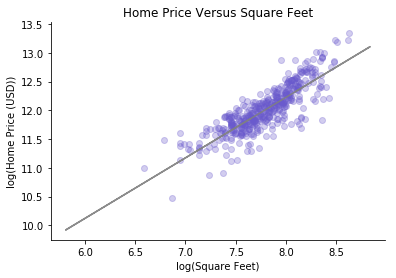

In [21]:
# Visualizing the training set results

# Scatter plot of the actual training results
plt.scatter(X_test, y_test, color = "slateblue", alpha=0.3)

# Line plot of the predictions
plt.plot(X_train, regressor.predict(X_train), color = "grey", alpha=0.9)

# Add titles and labels
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

# Specifies that it's the end of the graph and that we're ready to plot it
plt.show()

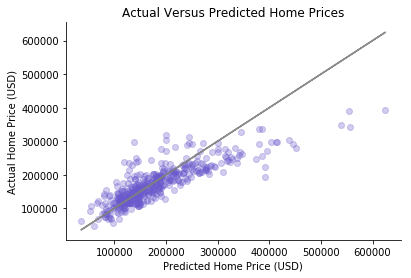

In [22]:
# Visualizing the actual versus predicted values

# Scatter plot of the predicted and actual values
plt.scatter(np.exp(y_test), np.exp(y_pred), color = "slateblue", alpha=0.3)

# Line plot of the actual values
plt.plot(np.exp(y_test), np.exp(y_test), color = "grey", alpha=0.9)

# Add titles and labels
plt.title("Actual Versus Predicted Home Prices")
plt.xlabel("Predicted Home Price (USD)")
plt.ylabel("Actual Home Price (USD)")
plt.grid(False)
sns.despine()

# Specifies that it's the end of the graph and that we're ready to plot it
plt.show()

In [23]:
# Run the linear regression model
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2940.
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        22:16:48   Log-Likelihood:                 74.226
No. Observations:                1458   AIC:                            -144.5
Df Residuals:                    1456   BIC:                            -133.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7873      0.152     24.912      0.000       3.489       4.086
x1             1.0559      0.019     54.222      0.000       1.018       1.094
==============================================================================
Omnibus:                      174.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.851
Skew:                          -0.756   Prob(JB):                     2.37e-72
Kurtosis:                       4.773   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Print the training and testing scores
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6513868352113644
Testing Score: 0.705366453070932


In [25]:
# Put the actual and predicted test values into their own CSV file for Tableau presentation
actual_predictions = pd.DataFrame({"actual":y_test,"predictions":y_pred})
actual_predictions[["actual","predictions"]] = np.exp(actual_predictions[["actual","predictions"]])
actual_predictions.to_csv("03-kaggle_submission/01_actual_predictions.csv",header=True)

## Kaggle Competition Entry

In [26]:
# Load dataset
testing_data = pd.read_csv("02-cleaned_data/cleaned_testing.csv",index_col=0)

In [27]:
# Add "TotLivingSF" calculated field
testing_data["TotLivingSF"] = testing_data["GrLivArea"] + testing_data["TotalBsmtSF"] - testing_data["LowQualFinSF"]

In [28]:
# Separate x and y variables
# Matrix of independent variable (square feet data)
X_testing = np.log(testing_data.loc[:,["TotLivingSF"]].values)
y_pred_testing = regressor.predict(X_testing)

In [29]:
# Export results to own CSV
testing_data["SalePrice"] = y_pred_testing
testing_data['SalePrice'] = np.exp(testing_data['SalePrice'])
kaggle_output = testing_data["SalePrice"]
kaggle_output.to_csv("03-kaggle_submission/single_variable_regression_solution.csv",header=True)